In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


In [24]:
# 1. Data Loading
data = pd.read_csv('laptop_prices.csv')

In [26]:
# 2. Exploratory Data Analysis (EDA)
## a. Top 5 laptop brands by number of products
top_brands = data['Company'].value_counts().head(5)
print("Top 5 laptop brands by number of products:", top_brands)

Top 5 laptop brands by number of products: Company
Dell      291
Lenovo    289
HP        268
Asus      152
Acer      101
Name: count, dtype: int64


In [28]:
## b. Average price of laptops for each brand
average_prices = data.groupby('Company')['Price_euros'].mean().sort_values()
print("Average price of laptops for each brand:", average_prices)
print("Brand with the highest average price:", average_prices.idxmax())
print("Brand with the lowest average price:", average_prices.idxmin())

Average price of laptops for each brand: Company
Vero          217.425000
Mediacom      295.000000
Chuwi         314.296667
Acer          633.464455
Fujitsu       729.000000
HP           1080.314664
Lenovo       1093.862215
Asus         1123.829737
Xiaomi       1133.462500
Dell         1199.225120
Toshiba      1267.812500
Samsung      1413.444444
Huawei       1424.000000
Apple        1564.198571
Microsoft    1612.308333
Google       1677.666667
MSI          1728.908148
LG           2099.000000
Razer        3346.142857
Name: Price_euros, dtype: float64
Brand with the highest average price: Razer
Brand with the lowest average price: Vero


In [30]:
# 3. Feature Engineering
## d. Create a new feature 'StorageTotal'
data['StorageTotal'] = data['PrimaryStorage'] + data['SecondaryStorage']

Correlation matrix:              Price_euros  CPU_freq       Ram    Inches    Weight
Price_euros     1.000000  0.428847  0.740287  0.070091  0.211883
CPU_freq        0.428847  1.000000  0.366254  0.303115  0.318649
Ram             0.740287  0.366254  1.000000  0.245009  0.389370
Inches          0.070091  0.303115  0.245009  1.000000  0.827339
Weight          0.211883  0.318649  0.389370  0.827339  1.000000


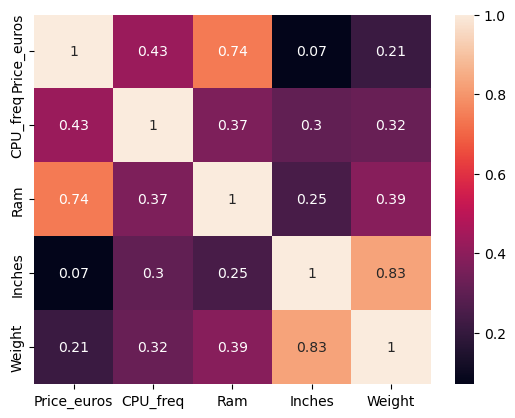

In [12]:
# 4. Correlation Analysis
## c. Correlation between Price_euros and other numeric features
correlation_matrix = data[['Price_euros', 'CPU_freq', 'Ram', 'Inches', 'Weight']].corr()
print("Correlation matrix:", correlation_matrix)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [32]:
# Clean data by dropping rows with missing 'Inches' as it's crucial for some models
data_cleaned = data.dropna(subset=['Inches', 'TypeName'])

In [34]:
# Selecting features and target for regression model
features = data_cleaned[['Ram', 'Inches', 'CPU_freq', 'PrimaryStorage', 'GPU_company']]
targets = data_cleaned['Price_euros']

In [44]:
# Now, your code should work without any issues.
categorical_features = ['GPU_company']
numeric_features = ['Ram', 'Inches', 'CPU_freq', 'PrimaryStorage']

column_transformer = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

In [50]:
# Pipeline for preprocessing and regression model
pipeline = Pipeline([
    ('transform', column_transformer),
    ('model', LinearRegression())  # Default model set to Linear Regression
])


In [52]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [54]:
# Fit and predict with the pipeline
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

In [56]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"MSE: {mse:.2f}, R^2 Score: {r2:.2f}")

MSE: 254883.27, R^2 Score: 0.58


In [58]:
# Testing other models (Ridge and Lasso)
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

In [60]:
for name, model in models.items():
    pipeline.set_params(model=model)  # Update the model in pipeline
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name} - MSE: {mse:.2f}, R^2 Score: {r2:.2f}")

Ridge Regression - MSE: 254954.25, R^2 Score: 0.58
Lasso Regression - MSE: 255159.60, R^2 Score: 0.58


## Classification Model

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [67]:
# Load data
data = pd.read_csv('laptop_prices.csv')

In [69]:
# Clean data: Drop rows with any missing values in the features or target
data_cleaned = data.dropna(subset=['TypeName', 'Inches', 'Ram', 'PrimaryStorage', 'Weight'])

In [71]:
# Features and target selection
features = data_cleaned[['Inches', 'Ram', 'PrimaryStorage', 'Weight']]
target = data_cleaned['TypeName']

In [73]:
# Preprocessing: Scaling the numerical features
preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), features.columns)
])

# Define models to evaluate
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [75]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [77]:
# Pipeline for preprocessing and classification
results = {}
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

In [79]:
 # Fit and predict
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

In [81]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"{name} Accuracy: {accuracy:.2f}")
print(f"Classification Report for {name}:\n{classification_report(y_test, predictions)}")

Gradient Boosting Accuracy: 0.72
Classification Report for Gradient Boosting:
                    precision    recall  f1-score   support

2 in 1 Convertible       0.43      0.25      0.32        24
            Gaming       0.62      0.88      0.73        41
           Netbook       0.67      0.67      0.67         6
          Notebook       0.82      0.83      0.83       132
         Ultrabook       0.62      0.68      0.65        34
       Workstation       1.00      0.14      0.25        14

          accuracy                           0.72       251
         macro avg       0.69      0.57      0.57       251
      weighted avg       0.73      0.72      0.70       251



In [83]:
if hasattr(classifier, 'feature_importances_'):
        importances = classifier.feature_importances_
        feature_importance = pd.DataFrame(importances, index=features.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
        print(f"Feature Importances for {name}:\n{feature_importance}\n")

Feature Importances for Gradient Boosting:
                Importance
Weight            0.568845
Ram               0.234478
Inches            0.140942
PrimaryStorage    0.055734



In [89]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [91]:
# Define models to evaluate
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42)
}

In [95]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.71


In [97]:
# Logistic Regression
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', log_reg_classifier)
])

log_reg_pipeline.fit(X_train, y_train)
log_reg_predictions = log_reg_pipeline.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.2f}")

Logistic Regression Accuracy: 0.69


In [99]:
# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn_classifier)
])

knn_pipeline.fit(X_train, y_train)
knn_predictions = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.2f}")

K-Nearest Neighbors Accuracy: 0.67


In [101]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', dt_classifier)
])

dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.69


In [103]:
# Naive Bayes
nb_classifier = GaussianNB()
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', nb_classifier)
])

nb_pipeline.fit(X_train, y_train)
nb_predictions = nb_pipeline.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")


Naive Bayes Accuracy: 0.61


In [105]:
# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm_classifier)
])

svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Support Vector Machine Accuracy: {svm_accuracy:.2f}")


Support Vector Machine Accuracy: 0.67
